<a href="https://colab.research.google.com/github/prince0012345/colab_work/blob/main/farm_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"agriculture_dataset.csv"

## Data loading

### Subtask:
Load the agriculture dataset.


**Reasoning**:
Load the dataset and display its first few rows and shape.



In [3]:
import pandas as pd

try:
    df_agriculture = pd.read_csv('agriculture_dataset.csv')
    display(df_agriculture.head())
    print(df_agriculture.shape)
except FileNotFoundError:
    print("Error: 'agriculture_dataset.csv' not found.")
except pd.errors.EmptyDataError:
    print("Error: 'agriculture_dataset.csv' is empty.")
except pd.errors.ParserError:
    print("Error: 'agriculture_dataset.csv' has parsing errors.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Soil_Type,Season,Water_Usage(cubic meters)
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,Loamy,Kharif,76648.20
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,Peaty,Kharif,68725.54
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,Silty,Kharif,75538.56
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,Silty,Zaid,45401.23
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,Clay,Zaid,93718.69


(50, 10)


## Data exploration

### Subtask:
Explore the agriculture dataset.


**Reasoning**:
Explore the agriculture dataset by examining data types, descriptive statistics, categorical distributions, shape, missing values, and correlations.



In [4]:
# Examine data types
print("Data Types:")
print(df_agriculture.dtypes)

# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
numerical_features = df_agriculture.select_dtypes(include=['number'])
print(numerical_features.describe())

# Analyze categorical features
print("\nCategorical Feature Distributions:")
categorical_features = df_agriculture.select_dtypes(include=['object'])
for col in categorical_features.columns:
    print(f"\nColumn: {col}")
    print(categorical_features[col].value_counts())

# Shape of the dataset
print(f"\nShape of the dataset: {df_agriculture.shape}")

# Missing values
print("\nMissing Values:")
print(df_agriculture.isnull().sum())
print(df_agriculture.isnull().sum() / len(df_agriculture) * 100)


# Potential correlations between numerical variables
print("\nCorrelation Matrix:")
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

Data Types:
Farm_ID                       object
Crop_Type                     object
Farm_Area(acres)             float64
Irrigation_Type               object
Fertilizer_Used(tons)        float64
Pesticide_Used(kg)           float64
Yield(tons)                  float64
Soil_Type                     object
Season                        object
Water_Usage(cubic meters)    float64
dtype: object

Descriptive Statistics for Numerical Features:
       Farm_Area(acres)  Fertilizer_Used(tons)  Pesticide_Used(kg)  \
count         50.000000              50.000000           50.000000   
mean         254.963800               4.905400            2.398000   
std          139.417782               2.732689            1.438613   
min           12.500000               0.500000            0.140000   
25%          135.710000               2.437500            0.972500   
50%          281.980000               5.045000            2.330000   
75%          368.107500               6.885000            3.417500

## Data visualization

### Subtask:
Visualize key features of the agriculture dataset.


**Reasoning**:
Visualize the key features of the agriculture dataset using histograms, box plots, scatter plots, and count plots.



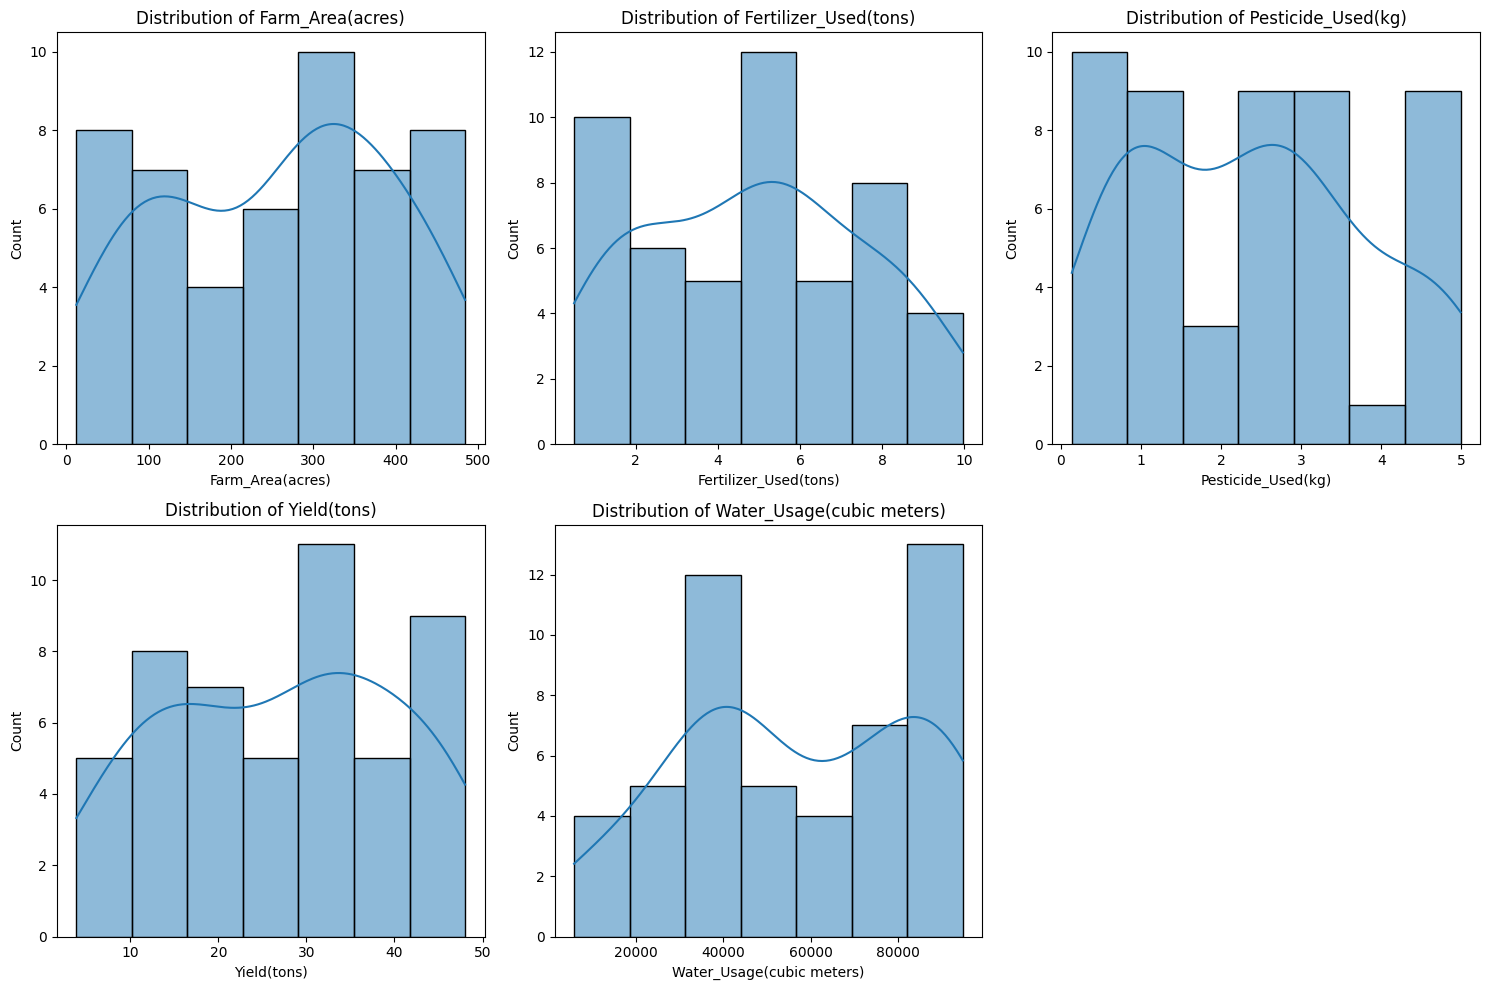

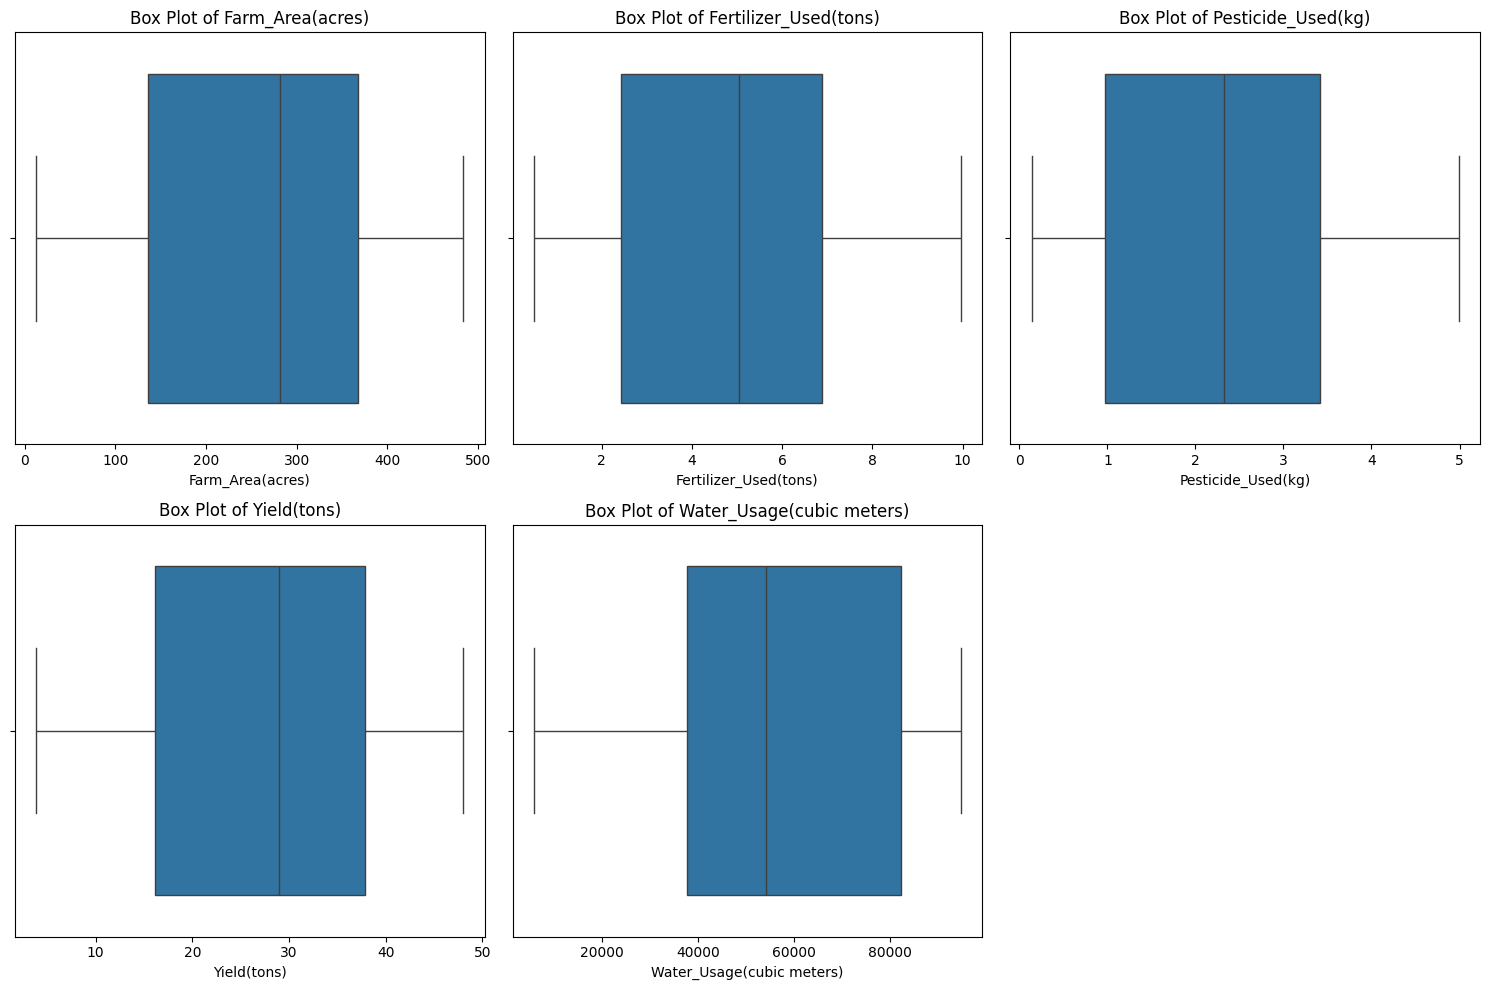

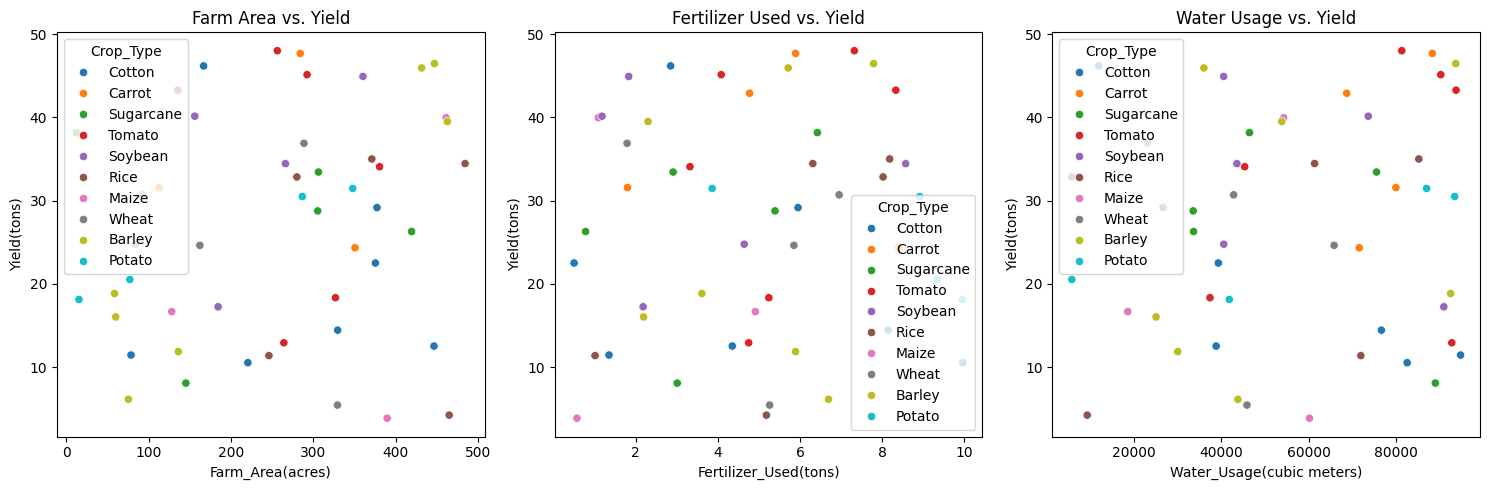

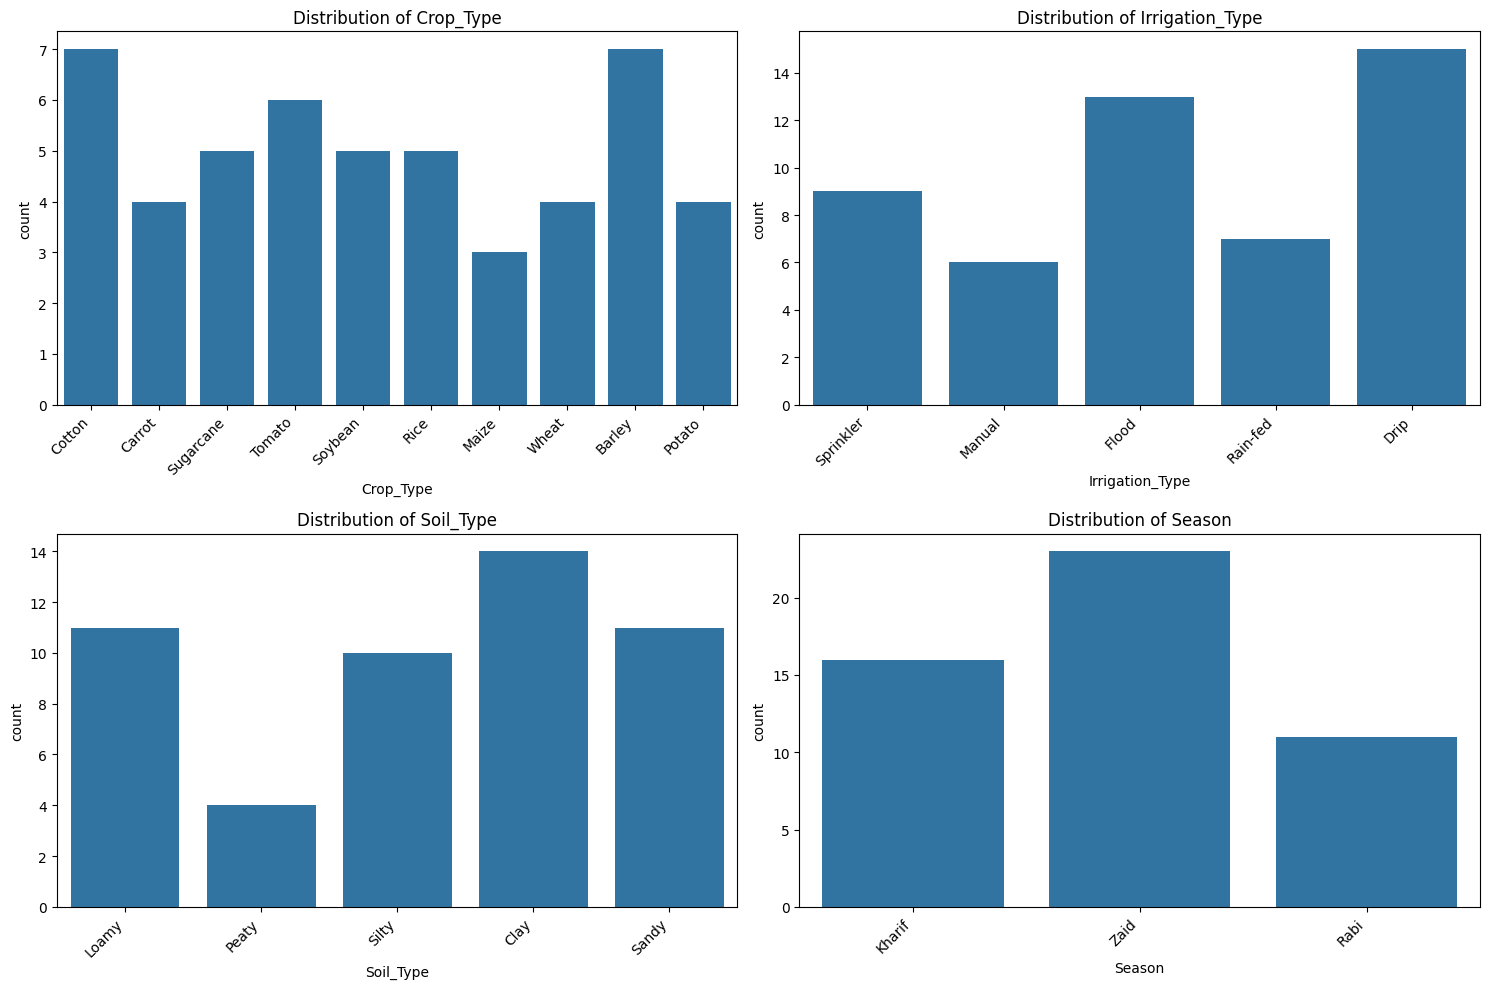

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
numerical_features = ['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_agriculture[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df_agriculture[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()


# Scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Farm_Area(acres)', y='Yield(tons)', hue='Crop_Type', data=df_agriculture)
plt.title('Farm Area vs. Yield')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Fertilizer_Used(tons)', y='Yield(tons)', hue='Crop_Type', data=df_agriculture)
plt.title('Fertilizer Used vs. Yield')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Water_Usage(cubic meters)', y='Yield(tons)', hue='Crop_Type', data=df_agriculture)
plt.title('Water Usage vs. Yield')

plt.tight_layout()
plt.savefig('scatterplots.png')
plt.show()


# Count plots for categorical features
categorical_cols = ['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data=df_agriculture)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout()
plt.savefig('countplots.png')
plt.show()

## Summary:

### Q&A
There were no explicit questions asked in the task. However, the overall goal was to understand the agriculture dataset.

### Data Analysis Key Findings
* The dataset contains 50 rows and 10 columns, with no missing values.
* Numerical features include farm area, fertilizer and pesticide usage, yield, and water usage.
* Categorical features include farm ID, crop type, irrigation type, soil type, and season.
* The most frequent crop types are Cotton and Barley, and the most common irrigation type is Drip.
* There's a weak positive correlation between farm area and yield. `Farm_Area(acres)` shows weak negative correlations with `Fertilizer_Used(tons)` and `Pesticide_Used(kg)`.
* Visualizations (histograms, box plots, scatter plots, and count plots) were generated to understand data distributions, potential outliers, and relationships between variables.  Histograms and box plots revealed the distribution of numerical features. Scatter plots illustrated the relationship between farm area, fertilizer usage, water usage, and yield, colored by crop type. Count plots showed the frequency of each category in categorical features.

### Insights or Next Steps
* Investigate the weak negative correlations between farm area and fertilizer/pesticide use to understand the underlying reasons.
* Explore potential outliers identified in the box plots and histograms to see if they represent valid data points or errors.


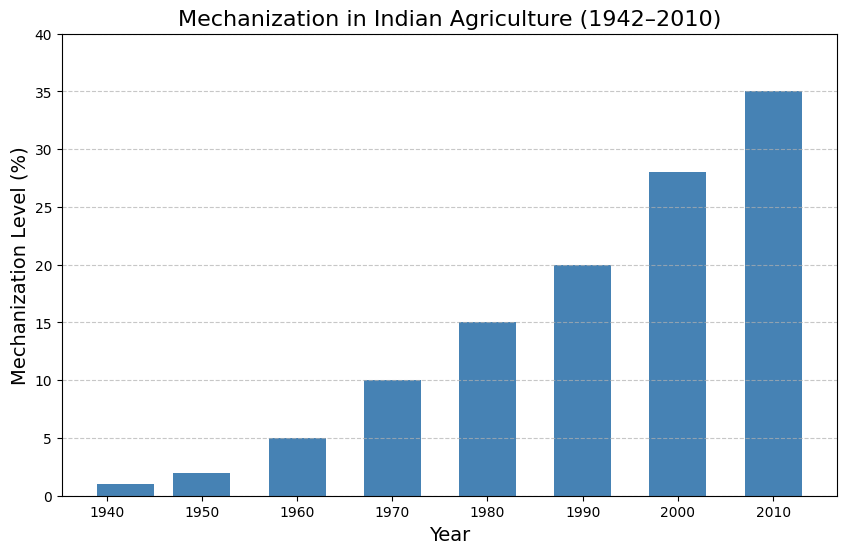

In [6]:
import matplotlib.pyplot as plt

years = [1942, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
mechanization = [1, 2, 5, 10, 15, 20, 28, 35]

plt.figure(figsize=(10,6))
plt.bar(years, mechanization, color='#4682B4', width=6)
plt.title('Mechanization in Indian Agriculture (1942–2010)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mechanization Level (%)', fontsize=14)
plt.ylim(0, 40)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
